In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns

from imblearn.over_sampling import SMOTE #for SMOTE -> install package using: conda install -c conda-forge imbalanced-learn
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import TomekLinks 
from imblearn.under_sampling import RandomUnderSampler

from imblearn.over_sampling import RandomOverSampler 
from scipy import stats, integrate
import matplotlib.pyplot as plt
import ggplot
import scipy
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.svm import NuSVC
#from sklearn.svm import SVR #just Testing for regression on other continous data of dataset
from sklearn.decomposition import PCA, NMF
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2


import pylab as pl
from itertools import cycle
from sklearn import cross_validation
from sklearn.svm import SVC

#features_list = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','class']
#dataset1=pd.read_csv("data/Heart_Disease_Data.csv")
dataset1=pd.read_csv("data/train_human.csv")


/Users/davidleonardi/anaconda3/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Users/davidleonardi/anaconda3/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/Users/davidleonardi/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/davidleonardi/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into whi

In [2]:
# SVM requires that each data instance is represented as a vector of real numbers
# If you already have numeric dtypes (int8|16|32|64,float64,boolean) you can convert it to another "numeric" dtype using Pandas .astype() method. Demo: In [90]: df = pd.DataFrame(np.random.randint(10**5,10**7,(5,3)),columns=list('abc'), dtype=np.int64) In [91]: df Out[91]: a b c 0 9059440 9590567 2076918 1 5861102 4566089 1947323 2 6636568 162770 2487991 3 6794572 5236903 5628779 4 470121 4044395 4546794 In [92]: df.dtypes Out[92]: a int64 b int64 c int64 dtype: object In [93]: df['a'] = df['a'].astype(float) In [94]: df.dtypes Out[94]: a float64 b int64 c int64 dtype: object It won't work for object (string) dtypes, that can't be converted to numbers: In [95]: df.loc[1, 'b'] = 'XXXXXX' In [96]: df Out[96]:...
# Just make everything numeric for ease, later we will convert to ordinal/one-hot encoding.
dataset1 = dataset1.convert_objects(convert_numeric=True)
dataset1 = dataset1.astype('float')

/Users/davidleonardi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.


#### Count missing value in terms of columns #######

In [3]:
dataset1

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1.0,1.0
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1.0,1.0
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1.0,1.0
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1.0,1.0
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1.0,1.0
5,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,-0.844619,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126,1.0,1.0
6,0.279454,-0.019641,-0.110022,-0.996921,-0.967186,-0.983118,-0.997003,-0.966097,-0.983116,-0.940987,...,-0.564430,-0.212754,-0.230622,0.014637,-0.189512,-0.852150,0.182170,-0.043010,1.0,1.0
7,0.277432,-0.030488,-0.125360,-0.996559,-0.966728,-0.981585,-0.996485,-0.966313,-0.982982,-0.940987,...,-0.421715,-0.020888,0.593996,-0.561871,0.467383,-0.851017,0.183779,-0.041976,1.0,1.0
8,0.277293,-0.021751,-0.120751,-0.997328,-0.961245,-0.983672,-0.997596,-0.957236,-0.984379,-0.940598,...,-0.572995,0.012954,0.080936,-0.234313,0.117797,-0.847971,0.188982,-0.037364,1.0,1.0
9,0.280586,-0.009960,-0.106065,-0.994803,-0.972758,-0.986244,-0.995405,-0.973663,-0.985642,-0.940028,...,0.140452,-0.020590,-0.127730,-0.482871,-0.070670,-0.848294,0.190310,-0.034417,1.0,1.0


In [4]:
#dataset.shape[0] - dataset.count()
print(dataset1.isnull().any())
dataset1 = dataset1.replace('?', np.nan)

tBodyAcc-mean()-X                       False
tBodyAcc-mean()-Y                       False
tBodyAcc-mean()-Z                       False
tBodyAcc-std()-X                        False
tBodyAcc-std()-Y                        False
tBodyAcc-std()-Z                        False
tBodyAcc-mad()-X                        False
tBodyAcc-mad()-Y                        False
tBodyAcc-mad()-Z                        False
tBodyAcc-max()-X                        False
tBodyAcc-max()-Y                        False
tBodyAcc-max()-Z                        False
tBodyAcc-min()-X                        False
tBodyAcc-min()-Y                        False
tBodyAcc-min()-Z                        False
tBodyAcc-sma()                          False
tBodyAcc-energy()-X                     False
tBodyAcc-energy()-Y                     False
tBodyAcc-energy()-Z                     False
tBodyAcc-iqr()-X                        False
tBodyAcc-iqr()-Y                        False
tBodyAcc-iqr()-Z                  

#### check for duplications

In [5]:
dataset1.duplicated().any()
dataset1.drop_duplicates(inplace=True, keep=False)
dataset1


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1.0,1.0
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1.0,1.0
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1.0,1.0
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1.0,1.0
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1.0,1.0
5,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,-0.844619,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126,1.0,1.0
6,0.279454,-0.019641,-0.110022,-0.996921,-0.967186,-0.983118,-0.997003,-0.966097,-0.983116,-0.940987,...,-0.564430,-0.212754,-0.230622,0.014637,-0.189512,-0.852150,0.182170,-0.043010,1.0,1.0
7,0.277432,-0.030488,-0.125360,-0.996559,-0.966728,-0.981585,-0.996485,-0.966313,-0.982982,-0.940987,...,-0.421715,-0.020888,0.593996,-0.561871,0.467383,-0.851017,0.183779,-0.041976,1.0,1.0
8,0.277293,-0.021751,-0.120751,-0.997328,-0.961245,-0.983672,-0.997596,-0.957236,-0.984379,-0.940598,...,-0.572995,0.012954,0.080936,-0.234313,0.117797,-0.847971,0.188982,-0.037364,1.0,1.0
9,0.280586,-0.009960,-0.106065,-0.994803,-0.972758,-0.986244,-0.995405,-0.973663,-0.985642,-0.940028,...,0.140452,-0.020590,-0.127730,-0.482871,-0.070670,-0.848294,0.190310,-0.034417,1.0,1.0


In [6]:
# # based on https://pdfs.semanticscholar.org/daa0/f01f96a89fcfc5f41a2da67fb2a8966900ab.pdf 
# # we should pick these features:
# Genetic_Based_Decision = dataset1[['cp','trestbps', 'restecg', 'thalach', 'ca', 'thal']]

In [7]:
# continuous_vars = dataset1[['age', 'restecg', 'chol', 'thalach', 'oldpeak']] 

# def checkforoutlier(df):
#     outliersnumbers = 0
#     for column in df:
#         for number in df[column]:
#             if number < np.percentile(
#                 df[column], 25)-(np.percentile(
#                 df[column], 75)-np.percentile(
#                 df[column], 25)) or number > np.percentile(
#                 df[column], 75)+(np.percentile(
#                 df[column], 75)-np.percentile(
#                 df[column], 25)):
#                     print("outlier: ", number, column)
#                     outliersnumbers += 1
#     return outliersnumbers, 'outliers. That is', round(float(outliersnumbers)/float(len(df[column]))*100, 0), 'percent of the total list'

# print(checkforoutlier(continuous_vars))

# # Thalach seems very high, but after research a heartbeat of 202 is possible: 

In [8]:
# # Two variables are discrete/ordinal: ca (number of major vessels colored by fluoroscopy) and num (diagnosis of heart disease)
# # Three can be directly viewed as 1 hot (because binary): 'sex':'male', 'fbs':'fasting blood sugar', 'exang':'exercise induced angina'

# which leaves for one-hot encoding. problem is that the values aren't unique, so have to manually
# # make extra columns:

# dataset1["cp"] = dataset1["cp"].replace([1,2,3,4], ["typical angina", "atypical angina", "non-angina", "asymptomatic angina"])
# dataset1["restecg"] = dataset1["restecg"].replace([0,1,2], ["normalresecg", "ST-T wave abnormality", "left ventricular hypertrophy"])
# dataset1["slop"] = dataset1["slop"].replace([1,2,3], ["upsloping", "flat", "downsloping"])
# dataset1["thal"] = dataset1["thal"].replace([3,6,7], ["normalthal", "fixed defect", "reversible defect"])

# x = dataset1[['cp', 'restecg', 'slop', 'thal']]
# for column in ['cp', 'restecg', 'slop', 'thal']:
#     one_hot = pd.get_dummies(dataset1[column])
#     dataset1 = dataset1.drop(column, axis=1)
#     dataset1 = dataset1.join(one_hot)

In [9]:
### Extract features and labels from dataset for local testing:
dataset1.dropna(inplace=True, axis=0, how="any")
Y=dataset1["Activity"]
dataset1 = dataset1.drop("Activity", axis=1)
X=dataset1

In [10]:
# evaluate the model by splitting into train and test sets  #Edit by ryan, we aim to do 3 traditional sets in the end, this first split is 80/20
features_train, features_test, labels_train, labels_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [11]:
print(features_train)

      tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
4847           0.210909           0.018408          -0.110808   
743            0.248948          -0.015019          -0.131942   
6211           0.354629           0.017335          -0.061771   
5857           0.149762           0.013896          -0.105792   
7243           0.268605          -0.021542          -0.096655   
546            0.275423          -0.021202          -0.110077   
5165           0.272684          -0.018036          -0.104350   
5279           0.277452          -0.018574          -0.108280   
1192           0.283703          -0.028851          -0.080383   
96             0.349059          -0.022004          -0.150052   
3873           0.273903          -0.016212          -0.110903   
5271           0.224273          -0.000686           0.055249   
1749           0.210394          -0.055646          -0.082174   
6870           0.275765          -0.016464          -0.104569   
1248           0.246172  

In [12]:
print(type(features_train))

<class 'pandas.core.frame.DataFrame'>


In [11]:
import collections

list1 = []
for i in labels_train:
    list1.append(i)
counter=collections.Counter(list1)
print(counter)

list2 = []
for i in labels_test:
    list2.append(i)
counter=collections.Counter(list2)
print(counter)

Counter({3.0: 972, 1.0: 965, 2.0: 880, 4.0: 865, 6.0: 758, 5.0: 706})
Counter({3.0: 435, 1.0: 409, 2.0: 406, 4.0: 361, 6.0: 315, 5.0: 280})


In [12]:
# Check
print(len(features_train)/(len(features_train)+ len(features_test)))

0.6999455930359086


In [13]:
features_train_df = pd.DataFrame(features_train)
features_train_df.to_csv('features_train.csv', index=False)

features_test_df = pd.DataFrame(features_test)
features_test_df.to_csv('features_test.csv', index=False)

labels_train_df = pd.DataFrame(labels_train)
labels_train_df.to_csv('labels_train.csv', index=False)

labels_test_df = pd.DataFrame(labels_test)
labels_test_df.to_csv('labels_test.csv', index=False)

## Feature Importance Scores based on XGBoost (by David)

In [19]:
import xgboost as xgb
import operator

xgb_params = {
    'eta': 0.037,
    'max_depth': 5,
    'subsample': 0.80,
    'objective': 'multi:softprob',
    'eval_metric': 'mlogloss',
    'lambda': 0.8,   
    'alpha': 0.4,
    'silent': 1,
    'num_class': 7
}

dtrain = xgb.DMatrix(features_train, labels_train)
dtest = xgb.DMatrix(features_test, labels_test)

num_boost_rounds = 250

watchlist = [(dtrain, 'train'), (dtest, 'test')]

# train model
xgb_model = xgb.train(xgb_params, dtrain, num_boost_rounds, watchlist)

[0]	train-mlogloss:1.83287	test-mlogloss:1.83707
[1]	train-mlogloss:1.73243	test-mlogloss:1.74002
[2]	train-mlogloss:1.64209	test-mlogloss:1.65329
[3]	train-mlogloss:1.56036	test-mlogloss:1.57484
[4]	train-mlogloss:1.48466	test-mlogloss:1.50207
[5]	train-mlogloss:1.41555	test-mlogloss:1.43553
[6]	train-mlogloss:1.3508	test-mlogloss:1.37308
[7]	train-mlogloss:1.29126	test-mlogloss:1.31566
[8]	train-mlogloss:1.23579	test-mlogloss:1.26195
[9]	train-mlogloss:1.18369	test-mlogloss:1.21194
[10]	train-mlogloss:1.13462	test-mlogloss:1.16482
[11]	train-mlogloss:1.08842	test-mlogloss:1.12044
[12]	train-mlogloss:1.04461	test-mlogloss:1.07818
[13]	train-mlogloss:1.00327	test-mlogloss:1.03795
[14]	train-mlogloss:0.964493	test-mlogloss:1.00034
[15]	train-mlogloss:0.927213	test-mlogloss:0.964532
[16]	train-mlogloss:0.892386	test-mlogloss:0.930785
[17]	train-mlogloss:0.85896	test-mlogloss:0.898715
[18]	train-mlogloss:0.827425	test-mlogloss:0.868038
[19]	train-mlogloss:0.796953	test-mlogloss:0.838318
[

[159]	train-mlogloss:0.021687	test-mlogloss:0.054671
[160]	train-mlogloss:0.021309	test-mlogloss:0.05421
[161]	train-mlogloss:0.020953	test-mlogloss:0.053801
[162]	train-mlogloss:0.020579	test-mlogloss:0.053372
[163]	train-mlogloss:0.020209	test-mlogloss:0.052951
[164]	train-mlogloss:0.019854	test-mlogloss:0.05254
[165]	train-mlogloss:0.019534	test-mlogloss:0.052066
[166]	train-mlogloss:0.01921	test-mlogloss:0.051661
[167]	train-mlogloss:0.018905	test-mlogloss:0.051261
[168]	train-mlogloss:0.01861	test-mlogloss:0.050867
[169]	train-mlogloss:0.018321	test-mlogloss:0.050419
[170]	train-mlogloss:0.018015	test-mlogloss:0.050055
[171]	train-mlogloss:0.017719	test-mlogloss:0.04968
[172]	train-mlogloss:0.01742	test-mlogloss:0.049276
[173]	train-mlogloss:0.017134	test-mlogloss:0.048845
[174]	train-mlogloss:0.016872	test-mlogloss:0.048482
[175]	train-mlogloss:0.01662	test-mlogloss:0.048145
[176]	train-mlogloss:0.016363	test-mlogloss:0.047818
[177]	train-mlogloss:0.016111	test-mlogloss:0.047462


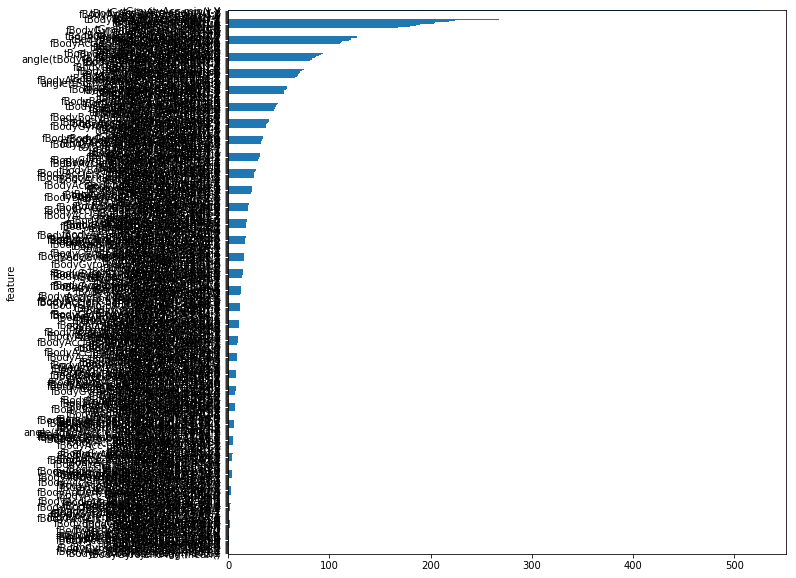

In [20]:
importance = xgb_model.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1))

importance_df = pd.DataFrame(importance, columns=['feature', 'fscore'])

# Plot Feature Importance
plt.figure()
importance_df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(10, 10))

In [21]:
def feature_selection(dataframe, importance_scores_df, threshold=0.4):
    normalized_df = importance_scores_df.copy()
    normalized_df['fscore'] = (importance_scores_df['fscore'] - importance_scores_df['fscore'].min())/(importance_scores_df['fscore'].max()-importance_scores_df['fscore'].min())
    normalized_df = normalized_df[normalized_df['fscore'] >= threshold]
    new_dataframe = dataframe.filter(items=normalized_df['feature'].tolist())
    return new_dataframe

features_train_009_df = feature_selection(features_train_df, importance_df, threshold=0.09)
features_train_009 = features_train_009_df.as_matrix()
features_train_04_df = feature_selection(features_train_df, importance_df, threshold=0.4)
features_train_04 = features_train_04_df.as_matrix()

features_test_009_df = feature_selection(features_test_df, importance_df, threshold=0.09)
features_test_009 = features_test_009_df.as_matrix()
features_test_04_df = feature_selection(features_test_df, importance_df, threshold=0.4)
features_test_04 = features_test_04_df.as_matrix()

## Principal Component Analysis 

In [17]:
from numpy import linalg as LA

def eigen_scores(dataframe):
    dataframe-=np.mean(dataframe, axis=0)
    dataframe/=np.std(dataframe, axis=0)
    cov_mat=np.cov(dataframe, rowvar=False)
    evals, evecs = np.linalg.eigh(cov_mat)
    idx = np.argsort(evals)[::-1]
    evecs = evecs[:,idx]
    evals = evals[idx]
    return evals, evecs

def my_pca(dataframe, n_components):
    pca=PCA(n_components=n_components)
    return pca.fit_transform(dataframe)



eigenvalues, eigenvectors = eigen_scores(features_test_04.copy())
n_components_04 = len(np.where(eigenvalues >= 1)[0])
print("Number of components for Dataset with threshold=0.4 is {}".format(n_components_04))

features_train_04_pca = my_pca(features_train_04, n_components_04)
features_test_04_pca = my_pca(features_test_04, n_components_04)

eigenvalues, eigenvectors = eigen_scores(features_test_009.copy())
n_components_009 = len(np.where(eigenvalues >= 1)[0])
print("Number of components for Dataset with threshold=0.09 is {}".format(n_components_009))

features_train_009_pca = my_pca(features_train_009, n_components_009)
features_test_009_pca = my_pca(features_test_009, n_components_009)

Number of components for Dataset with threshold=0.4 is 4
Number of components for Dataset with threshold=0.09 is 15


# Modelling And Training

We have an relatively small dataset. Therefore, we should do our feature selection based on a cross-
validated set. 

### SMOTE for SVM - Balancing only on the training set, not the validation set  [This is for the traditional training -not the cross validated one]

In [18]:
# #further divide the 'traditional' non-cross set into training 80/20  for pure training and cross validation  
# features_train_notoversampled, features_validate, labels_train_notoversampled, labels_validate = train_test_split(features_train, labels_train, test_size = .2, random_state=0)

# sm = SMOTE(random_state=0, ratio = 1.0, kind= 'svm' )
# #x_train_res, y_train_res = sm.fit_sample(x_train, y_train)
# features_train_oversampled, labels_train_oversampled = sm.fit_sample(features_train_notoversampled, labels_train_notoversampled)

# #re-enter into original variables
# ##features_train = features_train_oversampled
# ##labels_train = labels_train_oversampled

# #Below 2 lines if we want to want to force the array back into dataframe    
# ##features_train = pd.DataFrame(features_train_oversampled,columns=["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slop","ca","thal"])
# ##labels_train = pd.DataFrame(labels_train_oversampled,columns=["pred_attribute"])

## Standard Scaler (by David)
SVC Models are only any good when the data is scaled. Lets scale the data and build the model

In [19]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing.data import QuantileTransformer

scaler = MinMaxScaler()
Standard_scaler = StandardScaler()
Robust_scaler = preprocessing.RobustScaler(quantile_range=(25, 75))
Quantile_scalar = preprocessing.QuantileTransformer(output_distribution='normal')

features_train = Standard_scaler.fit_transform(features_train)
features_test = Standard_scaler.transform(features_test)

features_train_009 = Standard_scaler.fit_transform(features_train_009)
features_test_009 = Standard_scaler.transform(features_test_009)

features_train_04 = Standard_scaler.fit_transform(features_train_04)
features_test_04 = Standard_scaler.transform(features_test_04)

features_train_009_pca = Standard_scaler.fit_transform(features_train_009_pca)
features_test_009_pca = Standard_scaler.transform(features_test_009_pca)

features_train_04_pca = Standard_scaler.fit_transform(features_train_04_pca)
features_test_04_pca = Standard_scaler.transform(features_test_04_pca)

# Balancing only on the training set, not the validation set
Unfortunately SMOTE categorial implementation is not really implemented
We will do undersampling of majority AND oversampling of minority -> Done using external program SPSS 

In [20]:
# # Export data to files for external program to balance the data

# # without features selection
# train = np.concatenate((features_train, labels_train.values.reshape((-1, 1))), axis=1)
# train_df = pd.DataFrame(train) 
# train_df.to_csv("Undata/train_NoEng_NB.csv", index=False)

# # train_009
# train_009 = np.concatenate((features_train_009, labels_train.values.reshape((-1, 1))), axis=1)
# train_009_df = pd.DataFrame(train_009) 
# train_009_df.to_csv("Undata/train_009_NB.csv", index=False) 
    
# # train_04 
# train_04 = np.concatenate((features_train_04, labels_train.values.reshape((-1, 1))), axis=1)
# train_04_df = pd.DataFrame(train_04) 
# train_04_df.to_csv("Undata/train_04_NB.csv", index=False)

# # train_009_pca 
# train_009_pca = np.concatenate((features_train_009_pca, labels_train.values.reshape((-1, 1))), axis=1)
# train_009_pca_df = pd.DataFrame(train_009_pca) 
# train_009_pca_df.to_csv("Undata/train_009_pca_NB.csv", index=False)

# # train_04_pca
# train_04_pca = np.concatenate((features_train_04_pca, labels_train.values.reshape((-1, 1))), axis=1)
# train_04_pca_df = pd.DataFrame(train_04_pca) 
# train_04_pca_df.to_csv("Undata/train_04_pca_NB.csv", index=False)

In [21]:
#Temp code!
# labels train009




In [ ]:
total_rows = labels_train.count()
print(total_rows)

In [ ]:
# #further divide the 'traditional' non-cross set into training 80/20  for pure training and cross validation  
# #features_train_notoversampled, features_validate, labels_train_notoversampled, labels_validate = train_test_split(features_train, labels_train, test_size = .2, random_state=0)

# # sm = SMOTE(random_state=0, ratio = 1.0, kind= 'svm' )
# # #x_train_res, y_train_res = sm.fit_sample(x_train, y_train)
# # features_train_oversampled, labels_train_oversampled = sm.fit_sample(features_train, labels_train)

# rus = RandomUnderSampler(ratio=0.3,random_state=42)
# features_train, labels_train = rus.fit_sample(features_train, labels_train)
# # total_rows = labels_train.count()
# # print(total_rows)
# len(labels_train)


In [ ]:
# sm = SMOTEENN(random_state=0)
# #x_train_res, y_train_res = sm.fit_sample(x_train, y_train)
# features_train_oversampled, labels_train_oversampled = sm.fit_sample(features_train, labels_train)


# #re-enter into original variables
# features_train = features_train_oversampled
# labels_train = labels_train_oversampled

# len(labels_train)
# #Below 2 lines if we want to want to force the array back into dataframe    
# ##features_train = pd.DataFrame(features_train_oversampled,columns=["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slop","ca","thal"])
# ##labels_train = pd.DataFrame(labels_train_oversampled,columns=["pred_attribute"])

In [ ]:
# # without features selection
# train_noEng_df = pd.read_csv("Bdata/train_noEng_Balanced.csv")
# labels_train_noEng = train_noEng_df["22"]
# train_noEng_df = train_noEng_df.drop("22", axis=1)
# features_train_noEng = train_noEng_df.as_matrix()
# print(features_train_noEng)

# # train_009
# train_009_df = pd.read_csv("Bdata/train_009_B.csv")
# labels_train_009 = train_009_df["14"]
# train_009_df = train_009_df.drop("14", axis=1)
# features_train_009 = train_009_df.as_matrix()

# # train_04 
# train_04_df = pd.read_csv("Bdata/train_04_B.csv")
# labels_train_04 = train_04_df["5"]
# train_04_df = train_04_df.drop("5", axis=1)
# features_train_04 = train_04_df.as_matrix()

# # train_009_pca 
# train_009_pca_df = pd.read_csv("Bdata/train_009_PCA_B.csv")
# labels_train_009_pca = train_009_pca_df["5"]
# train_009_pca_df = train_009_pca_df.drop("5", axis=1)
# features_train_009_pca = train_009_pca_df.as_matrix()

# # train_04_pca
# train_04_pca_df = pd.read_csv("Bdata/train_04_PCA_B.csv")
# labels_train_04_pca = train_04_pca_df["2"]
# train_04_pca_df = train_04_pca_df.drop("2", axis=1)
# features_train_04_pca = train_04_pca_df.as_matrix()

In [20]:
features_train_009

array([[ 0.52483633,  0.99307616,  0.01881451, ..., -0.02420943,
        -0.0481059 , -0.51593223],
       [ 0.13404317, -0.17595256,  0.00570822, ..., -0.0246157 ,
        -0.16369792,  0.58085292],
       [-0.1844455 , -0.334862  , -0.01189615, ..., -0.0236486 ,
        -0.2131816 , -0.66129966],
       ..., 
       [-0.23947626, -0.69516728, -0.03823553, ..., -0.02268032,
        -0.05085357, -0.67199474],
       [-0.34478555, -0.11569117,  0.03342268, ..., -0.02765812,
        -0.13750265, -0.70381406],
       [ 0.39089888, -0.26507451, -0.02682582, ..., -0.02073824,
        -0.05971286, -0.37754938]])

In [23]:
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
#from sklearn import grid_search
#from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import mean_squared_error
import seaborn as sns
from scipy.stats import reciprocal, uniform

def checkmetrics(pred, labels_test, name):
    sns.set()
    print('The accuracy of ', name, 'is: ', accuracy_score(pred, labels_test))
    matrix = confusion_matrix(labels_test, pred)
    ax = sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues")
    print(ax)
    print(classification_report(pred, labels_test))

## Feature selection?

In [22]:
# # Feature selection using RFECV to pick best features,
# from sklearn.svm import SVR
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import RandomizedLasso
# from sklearn.feature_selection import RFECV
# rlasso = RandomizedLasso(alpha=0.025)
# names = features_list
# rlasso.fit(features_train, labels_train)
 
# print("Features sorted by their score using lasso:")
# print(sorted(zip(map(lambda x: round(x, 4), rlasso.scores_), 
#                  names), reverse=True))

# #use linear regression as the model
# lr = LinearRegression()
# #rank all features, i.e continue the elimination until the last one
# rfe = RFE(lr, n_features_to_select=1)
# rfe.fit(X,Y)
 
# print("Features sorted by their score using Linear Regression:")
# print(sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names)))

## Modelling with HyperParameters -Tuning - Default Dataset

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   12.5s remaining:   18.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   12.8s finished


The train score: 0.9477263894286825 with parameters: {'class_weight': 'balanced'}
The accuracy of  C-Support Vector Classification is:  0.943336355394379
AxesSubplot(0.125,0.125;0.62x0.755)
             precision    recall  f1-score   support

        1.0       0.89      0.84      0.87       430
        2.0       0.83      0.88      0.85       381
        3.0       1.00      0.99      1.00       439
        4.0       0.99      0.99      0.99       360
        5.0       0.99      1.00      0.99       276
        6.0       1.00      0.98      0.99       320

avg / total       0.94      0.94      0.94      2206



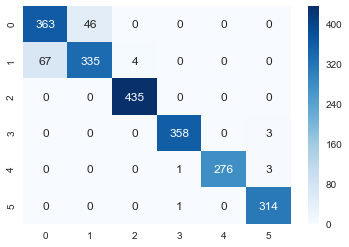

In [24]:
# svm.SVC  C-Support Vector Classification.
parameters ={
#          'C': [0.5,1.0,2.0,5.0,10.0],
#          'kernel': ['linear','poly','rbf'],
#          'degree': [2,3,4,5,6],
#         'gamma': [1e-3,1e-2,1,2,'auto'],
#         'tol' : [1e-4],
#         'decision_function_shape' : ['ovo','ovr'],
        'class_weight' : ['balanced'],
        }
SVM = svm.SVC()

grid_search_cv = GridSearchCV(SVM, parameters, cv=5,n_jobs=-1, return_train_score=True, refit=True,verbose=1)
grid_search_cv.fit(features_train, labels_train)
resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
print("The train score:", str(grid_search_cv.score(features_train, labels_train)), "with parameters:", grid_search_cv.best_params_)
pred = grid_search_cv.best_estimator_.predict(features_test)

checkmetrics(pred, labels_test, 'C-Support Vector Classification')

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   13.2s remaining:   19.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   13.3s finished


The train score: 0.94733773804897 with parameters: {}
The accuracy of  C-Support Vector Classification is:  0.9397098821396193
AxesSubplot(0.125,0.125;0.62x0.755)
             precision    recall  f1-score   support

        1.0       0.90      0.83      0.86       441
        2.0       0.81      0.89      0.85       370
        3.0       1.00      0.99      1.00       439
        4.0       0.99      0.99      0.99       362
        5.0       0.97      1.00      0.99       274
        6.0       0.99      0.97      0.98       320

avg / total       0.94      0.94      0.94      2206



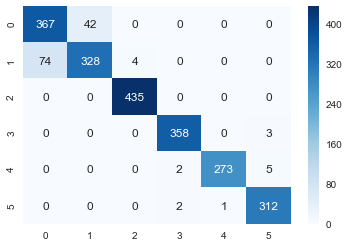

In [25]:
#svm.SVC  C-Support Vector Classification.
parameters ={
#          'C': [0.005,0.01,0.05,0.1,0.25,0.5,0.75,1.0,2.0],
#          'kernel': ['linear','poly','rbf'],
#          'degree': [2,3,4,5,6],
#         'gamma': [1e-3,1e-2,1,2,'auto'],
#         'tol' : [1e-4],
#         'decision_function_shape' : ['ovo','ovr'],
        }
SVM = svm.SVC()

grid_search_cv = GridSearchCV(SVM, parameters, cv=5,n_jobs=-1, return_train_score=True, refit=True,verbose=1)
grid_search_cv.fit(features_train, labels_train)
resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
print("The train score:", str(grid_search_cv.score(features_train, labels_train)), "with parameters:", grid_search_cv.best_params_)
pred = grid_search_cv.best_estimator_.predict(features_test)

checkmetrics(pred, labels_test, 'C-Support Vector Classification')

In [ ]:
#LinearSVC Linear Support Vector Classification

parameters ={
#       'penalty' : ['l2'], #Specifies the norm used in the penalization. The ‘l2’ penalty is the standard used in SVC. The ‘l1’ leads to coef_ vectors that are sparse.
#       'loss' : ['squared_hinge'], #Specifies the loss function. ‘hinge’ is the standard SVM loss (used e.g. by the SVC class) while ‘squared_hinge’ is the square of the hinge loss.
#        dual' : ['False'], #Select the algorithm to either solve the dual or primal optimization problem. Prefer dual=False when n_samples > n_features.
        'tol' : [1e-5,1e-4,1e-3],
        'C': [0.05,0.1,0.5,0.8,1.0,2.0,5.0,10.0,15.0],
        'multi_class'  : ['ovr','crammer_singer'],
        'random_state' : [42],
        'tol' : [1e-4],
        'max_iter' : [1000],
        }
SVM = LinearSVC()
grid_search_cv = GridSearchCV(SVM, parameters, cv=5,n_jobs=-1, return_train_score=True, refit=True,verbose=1)
grid_search_cv.fit(features_train, labels_train)
resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
print("The train score:", str(grid_search_cv.score(features_train, labels_train)), "with parameters:", grid_search_cv.best_params_)
pred = grid_search_cv.best_estimator_.predict(features_test)

checkmetrics(pred, labels_test, 'Linear Support Vector Classification')

In [ ]:
# sklearn.svm.NuSVC Nu-Support Vector Classification
# defaults: nu=0.5, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)
parameters = {
    'nu': [0.001,0.0025,0.005,0.0075,0.1], #other larger nu values is "not fleasible"
    'kernel': ['linear','poly','rbf'],
    'degree': [2,3,4,5,6],
    'gamma': [1e-5,1e-4,1e-3,1e-2,'auto'],
    'tol' : [1e-4],
    'decision_function_shape' : ['ovo','ovr'],

}


SVM = NuSVC()
grid_search_cv = GridSearchCV(SVM, parameters, cv=5,n_jobs=-1, return_train_score=True, refit=True,verbose=1)
grid_search_cv.fit(features_train, labels_train)
resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
print("The train score:", str(grid_search_cv.score(features_train, labels_train)), "with parameters:", grid_search_cv.best_params_)
pred = grid_search_cv.best_estimator_.predict(features_test)

checkmetrics(pred, labels_test, 'Nu-Support Vector Classification')


# Using Important Features with threshold >= 0.4 (XGB)

### XGB1 

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.5s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished


The train score: 0.9078896230081617 with parameters: {'class_weight': 'balanced'}
The accuracy of  C-Support Vector Classification is:  0.9125113327289212
AxesSubplot(0.125,0.125;0.62x0.755)
             precision    recall  f1-score   support

        1.0       0.86      0.86      0.86       407
        2.0       0.87      0.87      0.87       405
        3.0       1.00      1.00      1.00       435
        4.0       0.90      0.93      0.91       349
        5.0       0.96      0.93      0.95       290
        6.0       0.89      0.87      0.88       320

avg / total       0.91      0.91      0.91      2206



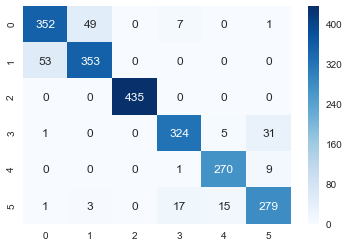

In [26]:
#svm.SVC  C-Support Vector Classification.
parameters ={
#          'C': [0.005,0.01,0.05,0.1,0.25,0.5,0.75,1.0,2.0],
#          'kernel': ['linear','poly','rbf'],
#          'degree': [2,3,4,5,6],
#         'gamma': [1e-3,1e-2,1,2,'auto'],
#         'tol' : [1e-4],
#         'decision_function_shape' : ['ovo','ovr'],
            'class_weight' : ['balanced'],

        }
SVM = svm.SVC()

grid_search_cv = GridSearchCV(SVM, parameters, cv=5,n_jobs=-1, return_train_score=True, refit=True,verbose=1)
grid_search_cv.fit(features_train_04, labels_train)
resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
print("The train score:", str(grid_search_cv.score(features_train_04, labels_train)), "with parameters:", grid_search_cv.best_params_)
pred = grid_search_cv.best_estimator_.predict(features_test_04)

checkmetrics(pred, labels_test, 'C-Support Vector Classification')

In [ ]:
#LinearSVC Linear Support Vector Classification

parameters ={
#       'penalty' : ['l2'], #Specifies the norm used in the penalization. The ‘l2’ penalty is the standard used in SVC. The ‘l1’ leads to coef_ vectors that are sparse.
#       'loss' : ['squared_hinge'], #Specifies the loss function. ‘hinge’ is the standard SVM loss (used e.g. by the SVC class) while ‘squared_hinge’ is the square of the hinge loss.
#        dual' : ['False'], #Select the algorithm to either solve the dual or primal optimization problem. Prefer dual=False when n_samples > n_features.
        'tol' : [1e-5,1e-4,1e-3],
        'C': [0.05,0.1,0.5,0.8,1.0,2.0,5.0,10.0,15.0],
        'multi_class'  : ['ovr','crammer_singer'],
        'random_state' : [42],
        'tol' : [1e-4],
        'max_iter' : [1000],
        }
SVM = LinearSVC()
grid_search_cv = GridSearchCV(SVM, parameters, cv=5,n_jobs=-1, return_train_score=True, refit=True,verbose=1)
grid_search_cv.fit(features_train_04, labels_train_04)
resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
print("The train score:", str(grid_search_cv.score(features_train_04, labels_train_04)), "with parameters:", grid_search_cv.best_params_)
pred = grid_search_cv.best_estimator_.predict(features_test_04)

checkmetrics(pred, labels_test, 'Linear Support Vector Classification')

In [ ]:
# sklearn.svm.NuSVC Nu-Support Vector Classification
# defaults: nu=0.5, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)
parameters = {
    'nu': [0.001,0.0025,0.005,0.0075,0.1,0.15], #other larger nu values is "not fleasible"
    'kernel': ['linear','poly','rbf'],
    'degree': [2,3,4,5,6],
    'gamma': [1e-5,1e-4,1e-3,1e-2,'auto'],
    'tol' : [1e-5],
    'decision_function_shape' : ['ovo','ovr'],

}


SVM = NuSVC()
grid_search_cv = GridSearchCV(SVM, parameters, cv=5,n_jobs=-1, return_train_score=True, refit=True,verbose=1)
grid_search_cv.fit(features_train_04, labels_train_04)
resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
print("The train score:", str(grid_search_cv.score(features_train_04, labels_train_04)), "with parameters:", grid_search_cv.best_params_)
pred = grid_search_cv.best_estimator_.predict(features_test_04)

checkmetrics(pred, labels_test, 'Nu-Support Vector Classification')


# Using Important Features with threshold >= 0.09 (XGB)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.9s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.0s finished


The train score: 0.9790128254955305 with parameters: {'class_weight': 'balanced'}
The accuracy of  C-Support Vector Classification is:  0.9728014505893019
AxesSubplot(0.125,0.125;0.62x0.755)
             precision    recall  f1-score   support

        1.0       0.95      0.92      0.93       420
        2.0       0.92      0.94      0.93       395
        3.0       1.00      1.00      1.00       435
        4.0       0.99      1.00      0.99       356
        5.0       1.00      1.00      1.00       280
        6.0       1.00      0.98      0.99       320

avg / total       0.97      0.97      0.97      2206



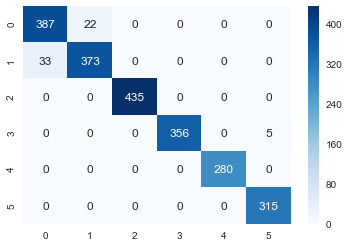

In [27]:
#svm.SVC  C-Support Vector Classification.
parameters ={
#          'C': [0.005,0.01,0.05,0.1,0.25,0.5,0.75,1.0,2.0],
#          'kernel': ['linear','poly','rbf'],
#          'degree': [2,3,4,5,6],
#         'gamma': [1e-3,1e-2,1,2,'auto'],
#         'tol' : [1e-4],
#         'decision_function_shape' : ['ovo','ovr'],
            'class_weight' : ['balanced'],

        }
SVM = svm.SVC()

grid_search_cv = GridSearchCV(SVM, parameters, cv=5,n_jobs=-1, return_train_score=True, refit=True,verbose=1)
grid_search_cv.fit(features_train_009, labels_train)
resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
print("The train score:", str(grid_search_cv.score(features_train_009, labels_train)), "with parameters:", grid_search_cv.best_params_)
pred = grid_search_cv.best_estimator_.predict(features_test_009)

checkmetrics(pred, labels_test, 'C-Support Vector Classification')

In [ ]:
#LinearSVC Linear Support Vector Classification

parameters ={
#       'penalty' : ['l2'], #Specifies the norm used in the penalization. The ‘l2’ penalty is the standard used in SVC. The ‘l1’ leads to coef_ vectors that are sparse.
#       'loss' : ['squared_hinge'], #Specifies the loss function. ‘hinge’ is the standard SVM loss (used e.g. by the SVC class) while ‘squared_hinge’ is the square of the hinge loss.
#        dual' : ['False'], #Select the algorithm to either solve the dual or primal optimization problem. Prefer dual=False when n_samples > n_features.
        'tol' : [1e-5,1e-4,1e-3],
        'C': [0.05,0.1,0.5,0.8,1.0,2.0,5.0,10.0,15.0],
        'multi_class'  : ['ovr','crammer_singer'],
        'random_state' : [42],
        'tol' : [1e-4],
        'max_iter' : [1000],
        }
SVM = LinearSVC()
grid_search_cv = GridSearchCV(SVM, parameters, cv=5,n_jobs=-1, return_train_score=True, refit=True,verbose=1)
grid_search_cv.fit(features_train_009, labels_train_009)
resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
print("The train score:", str(grid_search_cv.score(features_train_009, labels_train_009)), "with parameters:", grid_search_cv.best_params_)
pred = grid_search_cv.best_estimator_.predict(features_test_009)

checkmetrics(pred, labels_test, 'Linear Support Vector Classification')

In [ ]:
# sklearn.svm.NuSVC Nu-Support Vector Classification
# defaults: nu=0.5, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)
parameters = {
    'nu': [0.001,0.0025,0.005,0.0075,0.1], #other larger nu values is "not fleasible"
    'kernel': ['linear','poly','rbf'],
    'degree': [2,3,4,5,6],
    'gamma': [1e-5,1e-4,1e-3,1e-2,'auto'],
    'tol' : [1e-4],
    'decision_function_shape' : ['ovo','ovr'],

}


SVM = NuSVC()
grid_search_cv = GridSearchCV(SVM, parameters, cv=5,n_jobs=-1, return_train_score=True, refit=True,verbose=1)
grid_search_cv.fit(features_train_009, labels_train_009)
resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
print("The train score:", str(grid_search_cv.score(features_train_009, labels_train_009)), "with parameters:", grid_search_cv.best_params_)
pred = grid_search_cv.best_estimator_.predict(features_test_009)

checkmetrics(pred, labels_test, 'Nu-Support Vector Classification')


# Using PCA with Important Features (threshold >= 0.09) (XGB)

In [ ]:
#svm.SVC  C-Support Vector Classification.
parameters ={
         'C': [0.005,0.01,0.05,0.1,0.25,0.5,0.75,1.0,2.0],
         'kernel': ['linear','poly','rbf'],
         'degree': [2,3,4,5,6],
        'gamma': [1e-3,1e-2,1,2,'auto'],
        'tol' : [1e-4],
        'decision_function_shape' : ['ovo','ovr'],
        }
SVM = svm.SVC()

grid_search_cv = GridSearchCV(SVM, parameters, cv=5,n_jobs=-1, return_train_score=True, refit=True,verbose=1)
grid_search_cv.fit(features_train_009_pca, labels_train_009_pca)
resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
print("The train score:", str(grid_search_cv.score(features_train_009_pca, labels_train_009_pca)), "with parameters:", grid_search_cv.best_params_)
pred = grid_search_cv.best_estimator_.predict(features_test_009_pca)

checkmetrics(pred, labels_test, 'C-Support Vector Classification')

In [ ]:
#LinearSVC Linear Support Vector Classification

parameters ={
#       'penalty' : ['l2'], #Specifies the norm used in the penalization. The ‘l2’ penalty is the standard used in SVC. The ‘l1’ leads to coef_ vectors that are sparse.
#       'loss' : ['squared_hinge'], #Specifies the loss function. ‘hinge’ is the standard SVM loss (used e.g. by the SVC class) while ‘squared_hinge’ is the square of the hinge loss.
#        dual' : ['False'], #Select the algorithm to either solve the dual or primal optimization problem. Prefer dual=False when n_samples > n_features.
        'tol' : [1e-4],
        'C': [0.05,0.1,0.5,0.8,1.0,2.0,5.0,10.0,15.0],
        'multi_class'  : ['ovr','crammer_singer'],
        'random_state' : [42],
        'tol' : [1e-4],
        'max_iter' : [1000],
        }
SVM = LinearSVC()
grid_search_cv = GridSearchCV(SVM, parameters, cv=5,n_jobs=-1, return_train_score=True, refit=True,verbose=1)
grid_search_cv.fit(features_train_009_pca, labels_train_009_pca)
resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
print("The train score:", str(grid_search_cv.score(features_train_009_pca, labels_train_009_pca)), "with parameters:", grid_search_cv.best_params_)
pred = grid_search_cv.best_estimator_.predict(features_test_009_pca)

checkmetrics(pred, labels_test, 'Linear Support Vector Classification')

In [ ]:
# sklearn.svm.NuSVC Nu-Support Vector Classification
# defaults: nu=0.5, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)
parameters = {
    'nu': [0.001,0.0025,0.005,0.0075,0.1], #other larger nu values is "not fleasible"
    'kernel': ['linear','poly','rbf'],
    'degree': [2,3,4,5,6],
    'gamma': [1e-5,1e-4,1e-3,1e-2,'auto'],
    'tol' : [1e-4],
    'decision_function_shape' : ['ovo','ovr'],

}


SVM = NuSVC()
grid_search_cv = GridSearchCV(SVM, parameters, cv=5,n_jobs=-1, return_train_score=True, refit=True,verbose=1)
grid_search_cv.fit(features_train_009_pca, labels_train_009_pca)
resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
print("The train score:", str(grid_search_cv.score(features_train_009_pca, labels_train_009_pca)), "with parameters:", grid_search_cv.best_params_)
pred = grid_search_cv.best_estimator_.predict(features_test_009_pca)

checkmetrics(pred, labels_test, 'Nu-Support Vector Classification')


# Using PCA with Important Features (threshold >= 0.4) (XGB)

In [ ]:
#svm.SVC  C-Support Vector Classification.
parameters ={
#          'C': [0.005,0.01,0.05,0.1,0.25,0.5,0.75,1.0,2.0],
#          'kernel': ['linear','poly','rbf'],
#          'degree': [2,3,4,5,6],
#         'gamma': [1e-3,1e-2,1,2,'auto'],
#         'tol' : [1e-3],
#         'decision_function_shape' : ['ovo','ovr'],
        }
SVM = svm.SVC()

grid_search_cv = GridSearchCV(SVM, parameters, cv=5,n_jobs=-1, return_train_score=True, refit=True,verbose=1)
grid_search_cv.fit(features_train_04_pca, labels_train)
resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
print("The train score:", str(grid_search_cv.score(features_train_04_pca, labels_train)), "with parameters:", grid_search_cv.best_params_)
pred = grid_search_cv.best_estimator_.predict(features_test_04_pca)

checkmetrics(pred, labels_test, 'C-Support Vector Classification')

Fitting 5 folds for each of 1350 candidates, totalling 6750 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 516 tasks      | elapsed:   28.8s


In [ ]:
#LinearSVC Linear Support Vector Classification

parameters ={
#       'penalty' : ['l2'], #Specifies the norm used in the penalization. The ‘l2’ penalty is the standard used in SVC. The ‘l1’ leads to coef_ vectors that are sparse.
#       'loss' : ['squared_hinge'], #Specifies the loss function. ‘hinge’ is the standard SVM loss (used e.g. by the SVC class) while ‘squared_hinge’ is the square of the hinge loss.
#        dual' : ['False'], #Select the algorithm to either solve the dual or primal optimization problem. Prefer dual=False when n_samples > n_features.
        'tol' : [1e-3],
        'C': [0.05,0.1,0.5,0.8,1.0,2.0,5.0,10.0,15.0],
        'multi_class'  : ['ovr','crammer_singer'],
        'random_state' : [42],
        'tol' : [1e-3],
        'max_iter' : [1000],
        }
SVM = LinearSVC()
grid_search_cv = GridSearchCV(SVM, parameters, cv=5,n_jobs=-1, return_train_score=True, refit=True,verbose=1)
grid_search_cv.fit(features_train_04_pca, labels_train_04_pca)
resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
print("The train score:", str(grid_search_cv.score(features_train_04_pca, labels_train_04_pca)), "with parameters:", grid_search_cv.best_params_)
pred = grid_search_cv.best_estimator_.predict(features_test_04_pca)

checkmetrics(pred, labels_test, 'Linear Support Vector Classification')

In [ ]:
# sklearn.svm.NuSVC Nu-Support Vector Classification
# defaults: nu=0.5, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)
parameters = {
    'nu': [0.001,0.0025,0.005,0.0075,0.1], #other larger nu values is "not fleasible"
    'kernel': ['linear','poly','rbf'],
    'degree': [2,3,4,5,6],
    'gamma': [1e-5,1e-4,1e-3,1e-2,'auto'],
    'tol' : [1e-3],
    'decision_function_shape' : ['ovo','ovr'],

}


SVM = NuSVC()
grid_search_cv = GridSearchCV(SVM, parameters, cv=5,n_jobs=-1, return_train_score=True, refit=True,verbose=1)
grid_search_cv.fit(features_train_04_pca, labels_train_04_pca)
resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
print("The train score:", str(grid_search_cv.score(features_train_04_pca, labels_train_04_pca)), "with parameters:", grid_search_cv.best_params_)
pred = grid_search_cv.best_estimator_.predict(features_test_04_pca)

checkmetrics(pred, labels_test, 'Nu-Support Vector Classification')
